## SENG 474 Data Mining Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('google-play-store-apps/googleplaystore.csv')
#wait like 30s for this to finish
to_drop = ['Reviews',
          'Size',
          'Genres',
          'Last Updated',
          'Current Ver',
          'Android Ver']
data.drop(to_drop, inplace=True, axis=1)
data.head()

,App,Category,Rating,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,"100,000+",Free,0,Everyone


In [2]:
installs = r'^(\d*)'
extr = data["Installs"].str.replace(",", '')
extr = extr.str.extract(installs)
extr.head()



,0
0,10000
1,500000
2,5000000
3,50000000
4,100000


In [3]:

data["Installs"] = extr.apply(lambda x: pd.to_numeric(x), axis=0)

data.head()

,App,Category,Rating,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000.0,Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,500000.0,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000.0,Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000.0,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,100000.0,Free,0,Everyone


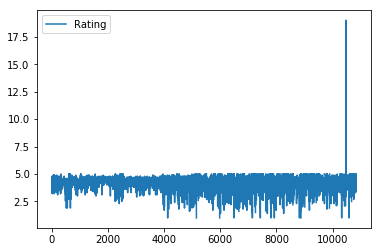

In [4]:
data.shape
data.plot(y=2)

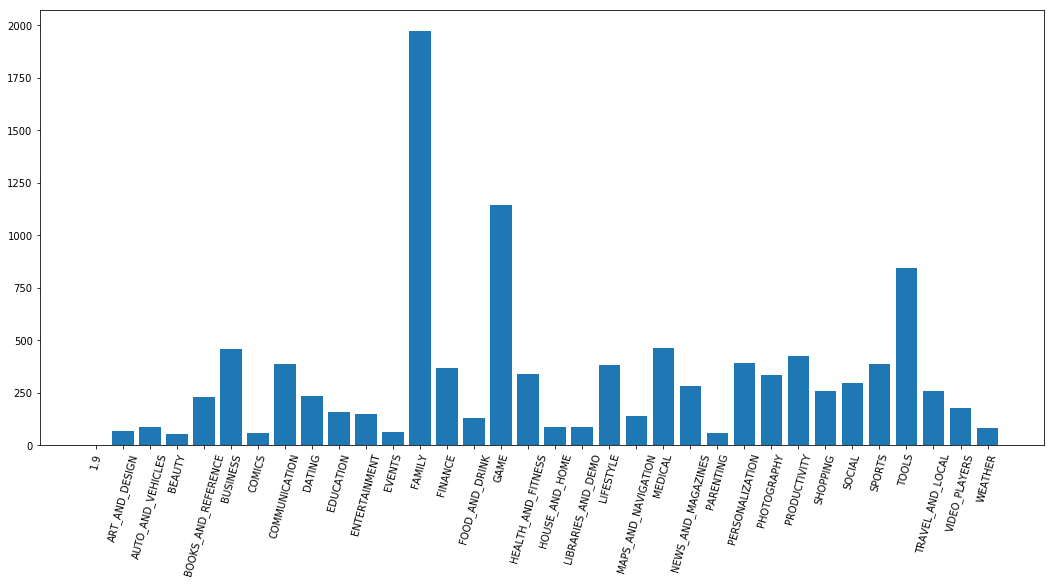

In [5]:
def count_unique(col):
    unique, counts = np.unique(col, return_counts=True)
    return np.array(list(zip(unique, counts)), dtype=object)

X = data.values

def plot_bar(col):
    categories = count_unique(col)

    fig, ax = plt.subplots(figsize=(18,8))
    y_pos = np.arange(len(categories[:, 0]))
    plt.bar(y_pos, categories[:, 1])
    plt.xticks(y_pos, categories[:, 0])
    plt.xticks(rotation=75)
    
plot_bar(X[:, 1])
#categories